In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
# Load the spam data
data = pd.read_csv('../data/spam.data',sep=' ',header=None)
train_test = pd.read_csv('../data/spam.traintest',header=None)

# Split in train/test
train_data = data[train_test.values==0]
test_data = data[train_test.values==1]

In [4]:
X_train = train_data.iloc[:,0:56].values
y_train = train_data.iloc[:,57].values

X_test = test_data.iloc[:,0:56].values
y_test = test_data.iloc[:,57].values

### Explicit use of cross_val_score

<IPython.core.display.Javascript object>


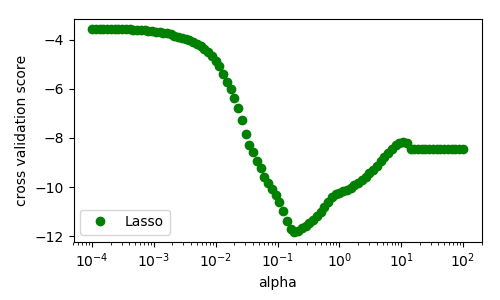

In [5]:
alphas = np.logspace(-4,2,100)

plt.figure(figsize=(5, 3))

for Model in [Ridge]:
    scores = [cross_val_score(Model(alpha), X_train, y_train, cv=5).mean()
            for alpha in alphas]
    plt.plot(alphas, scores,'go',label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()
plt.xscale('log')

### GridSearchCV

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-04,   1.14976e-04, ...,   8.69749e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)
0.0908712990474
0.00081113083079


<IPython.core.display.Javascript object>


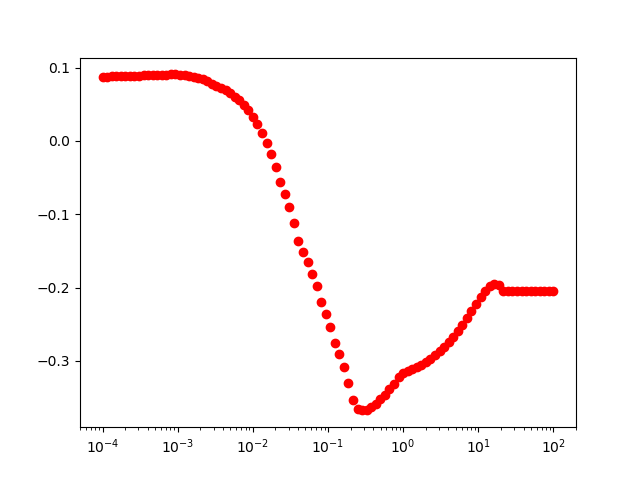

In [6]:
# prepare a range of alpha values to test
alphas = np.logspace(-4,2,100)
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train,y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

fig,ax = plt.subplots()
ax.semilogx(alphas,grid.cv_results_['mean_test_score'],'ro')

## Conclusion: Both the figures are similar. Internal consistency check passed.

## Final model

In [7]:
final_model = Ridge(alpha=grid.best_estimator_.alpha)
final_model.fit(X_train, y_train)
y_pred = np.array(final_model.predict(X_test) > 0.5, dtype=int)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.13
Variance score: 0.46
